![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [92]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
# read in csv files into variables
workout = pd.read_csv("data/workout.csv")
three_keywords = pd.read_csv("data/three_keywords.csv")
workout_geo = pd.read_csv("data/workout_geo.csv")
three_keywords_geo = pd.read_csv("data/three_keywords_geo.csv")

1. When was the global search for workout at its peak

In [94]:
# Import sub module datetime from datetime module
from datetime import datetime

#Convert month into a datetime object and create year variable
workout['month'] = pd.to_datetime(workout['month'])

workout['year']= workout['month'].dt.strftime('%Y')
workout.head()

,month,workout_worldwide,year
0,2018-03-01,59,2018
1,2018-04-01,61,2018
2,2018-05-01,57,2018
3,2018-06-01,56,2018
4,2018-07-01,51,2018


In [95]:
# we get the total workout for each year
workout2 = workout.groupby('year')['workout_worldwide'].sum().reset_index()
workout2

,year,workout_worldwide
0,2018,536
1,2019,646
2,2020,773
3,2021,685
4,2022,646
5,2023,174


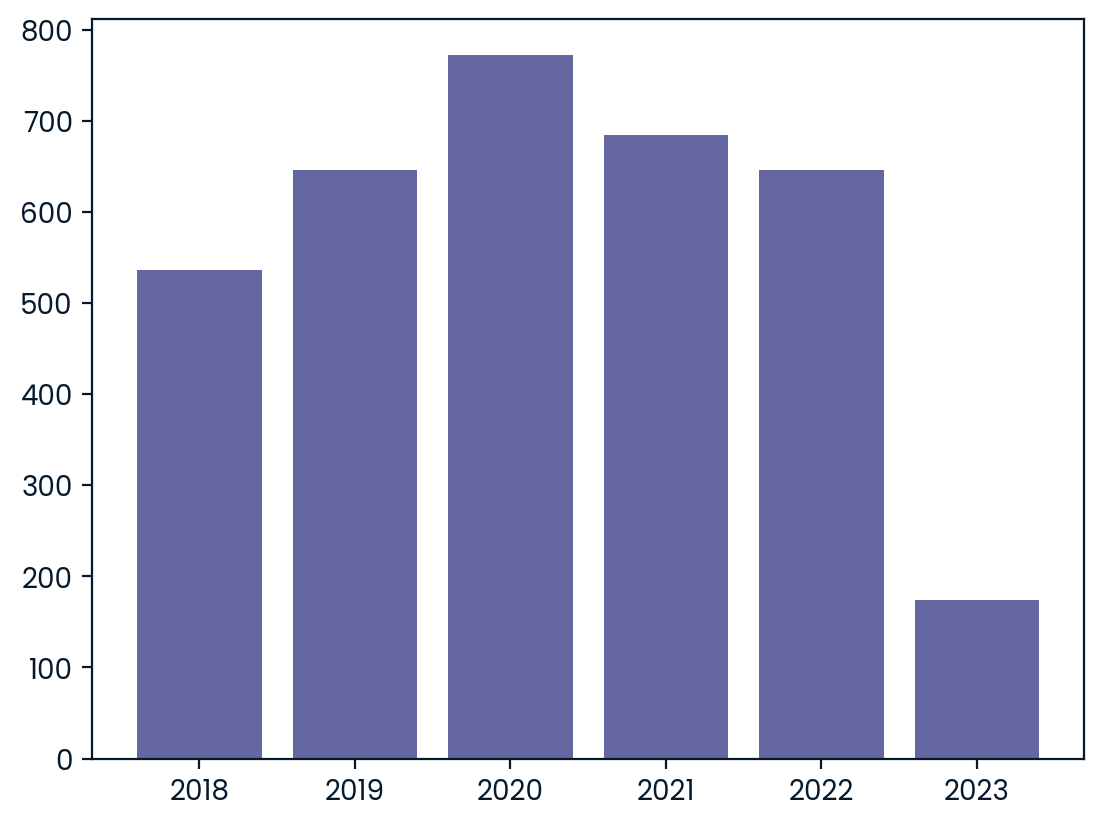

In [96]:
# plot a bar chart to show peak year
plt.bar(workout2['year'], workout2['workout_worldwide'])
plt.show()

In [97]:
# using boolean indexing to extract year with max keyword search
year_str = workout2.loc[workout2['workout_worldwide'] == workout2['workout_worldwide'].max(), 'year']

year_str = year_str.iloc[0]
type(year_str)

str

## 2. What key word was the most popular during the covid pandemic and what is the most popular now

In [98]:
three_keywords.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


In [99]:
# We create a year variable from the month variable and group the keywords by year
three_keywords2 = three_keywords.copy()

# Convert month variable into datetime object and create a new var year
three_keywords2['month'] = pd.to_datetime(three_keywords2['month'])
three_keywords2['year'] = three_keywords2['month'].dt.year

# group keywords by year
three_keywords3 = three_keywords2.groupby('year').sum().reset_index()
three_keywords3

,year,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018,117,161,94
1,2019,148,197,118
2,2020,327,171,239
3,2021,206,176,191
4,2022,160,220,152
5,2023,44,62,39


In [100]:
# convert the table from wide to narrow
three_keywords3 = three_keywords3.melt(id_vars= 'year', var_name= 'keyword', value_name= 'count')
three_keywords3

,year,keyword,count
0,2018,home_workout_worldwide,117
1,2019,home_workout_worldwide,148
2,2020,home_workout_worldwide,327
3,2021,home_workout_worldwide,206
4,2022,home_workout_worldwide,160
5,2023,home_workout_worldwide,44
6,2018,gym_workout_worldwide,161
7,2019,gym_workout_worldwide,197
8,2020,gym_workout_worldwide,171
9,2021,gym_workout_worldwide,176


In [101]:
#select the year of interest 
three_keywords_2020 = three_keywords3.loc[(three_keywords3['year'] == 2020) ]

#Select the most popular keyword
three_keywords_2020max = three_keywords_2020.loc[three_keywords_2020['count']== 
                                                 three_keywords_2020['count'].max(), 'keyword']


peak_covid= three_keywords_2020max.iloc[0]
print(three_keywords_2020max)
print(peak_covid)
type(peak_covid)

2    home_workout_worldwide
Name: keyword, dtype: object
home_workout_worldwide


str

In [102]:
#select the year of interest 
three_keywords_now = three_keywords3.loc[(three_keywords3['year'] == 2023) ]

# select the most popular keyword
three_keywords_nowmax = three_keywords_now.loc[three_keywords_now['count']== 
                                               three_keywords_now['count'].max(), 'keyword']
current= three_keywords_nowmax.iloc[0]
print(current)
type(current)

gym_workout_worldwide


str

## 3. What country has the highest interest for workouts among United states, Australia, Japan

In [103]:
# Select the three countries of interest
workout_geo_countries= workout_geo.loc[workout_geo['country'].isin(['United States', 'Australia', 'Japan'])]

# select country with max rating 
workout_geo_countries_max = workout_geo_countries.loc[workout_geo_countries['workout_2018_2023'] ==
                                                      workout_geo_countries['workout_2018_2023'].max(),
                                                      'country']

top_country = workout_geo_countries_max.iloc[0]

print(top_country)

United States


## 4. Which country among Malaysia or Phillipines has the highest interest in home workout

In [104]:
# Select variables of interest
keywords_geo = three_keywords_geo.drop(columns=['gym_workout_2018_2023', 'home_gym_2018_2023'])
keywords_geo

# Select countries of interest
keywords_geo_country = keywords_geo.loc[keywords_geo['Country'].isin(['Philippines', 'Malaysia'])]

# Select country with highest interest in homeworkout 
home_keyword = keywords_geo_country.loc[keywords_geo_country['home_workout_2018_2023'] == 
                                        keywords_geo_country['home_workout_2018_2023'].max(), 'Country']

home_workout_geo = home_keyword.iloc[0]

print(home_workout_geo)

Philippines
